# **📶California Housing Price Prediction**

#### Final project for **Python Machine Learning Diploma**📊📈

<center>

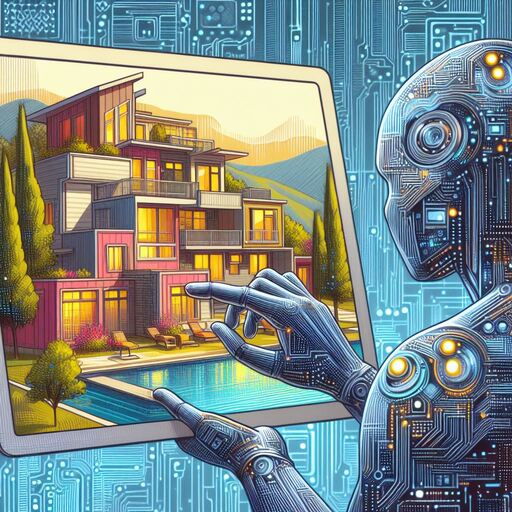

</center>


**This project was deployed and Hosted in Streamlit to provide an App For interactive California Housing Price Predicting.**

###  **[Click Here To Visit California Housing Price Predictor App!](https://hpredictapp.streamlit.app/)**

This dataset is from Kaggle and is used in this notebook for educational purposes. [Click here](<https://www.kaggle.com/datasets/camnugent/california-housing-prices/data>) to go to the original dataset.


Instructor: **Prof. Mostafa Othman**

By:  **Sawsan Abdulbari**

# **Table of contents**



1. [**Introduction to the Project**](#1-introduction)
2. [Importing Materials](#2-importing)

   2.1. [Importing **Libraries** and **Modules**](#21-import-libraries)

   2.2. [Loading **Data**](#22-loading-data)

3. [Data **Understanding**](#3-data-understanding)

   3.1. [Is there **Duplicated** Data?](#31-duplicated)

   3.2. [Are there **Missing** Values in the Data?](#32-missing-values)

   3.3. [Are there **Outlier** Values in the Data?](#33-outlier-values)
      
4. [Exploratory Data Analysis **(EDA)**](#4-eda)

   4.1. [**Statistical** Analysis with **Visualizations**](#41-visualizations)

   4.2. [Is there **correlation** between **numerical columns**?](#42-correlation-numerical-columns)

   4.3. [Overview: **relationships** between **variables**](#43-Overview-relationships-columns)
   
   4.4. [**Statistical Summary**](#44-summary)


5. [**Preprocessing** Data](#5-Preprocessing-Data)

   5.1. [**Preprocessing** data for **Machine Learning algorithms**](#51-preprocessing)

   5.2. [**Feature Engineering**](#52-feature-eng)

   5.3. [**Transformation Pipelines**](#53-pipelines)

6. [**Modeling**](#6-modeling)

   6.1. [Defining the **Models for Evaluation**](#61-modeling-evaluation)

   6.2. [**Training** and **testing** set](#62-modeling-t-t)

   6.3. [**Training and Evaluating** Models Using **Cross-Validation**](#63-modeling-evaluate)
   
   6.4. [**Optimizing** Model](#64-modeling-optimizing)

7. [**Predicting**, Feature Importance and Error Analysis](#7-predict)

   7.1. [**Predicting**](#71-predicting)

   7.2. [Analyzing **feature importance**](#72-predict-features)

   7.3. [**Error Analysis**](#73-error-analysis)

8. [**Exporting** to files](#8-save-project)

# 1. **Introduction** to the Project <a name="1-introduction"></a>

**Context:**

 California Housing dataset is a great dataset to be utilized for implementing machine learning algorithms as it requires data cleaning, has a clear but varying list of variables and is an optimal size for building a medium sized ML model.

  

  \

 **Content:**

 The dataset consist of information from the 1990 California census, with following columns providing insights:

- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value
- ocean_proximity

\


**Acknowledgements:**
   
This dataset was also used in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.

The data was initially featured:

Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

# 2. Getting **Data** and **Imports** <a name="2-importing"></a>

## 2.1. Importing **Libraries** and **Modules** <a name="21-import-libraries"></a>

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Enhances visualizations

# Preprocessing and Pipelines
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.utils import shuffle

# Feature Selection
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Validation
from sklearn.model_selection import cross_validate

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Saving
from joblib import dump


## 2.2. Loading the **Dataset** <a name="22-loading-data"></a>

In [2]:
df = pd.read_csv('/content/housing.csv')

In [3]:
# Displaying the first few rows of the DataFrame for a quick overview
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# 3. **Understanding** the Data <a name="3-data-understanding"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


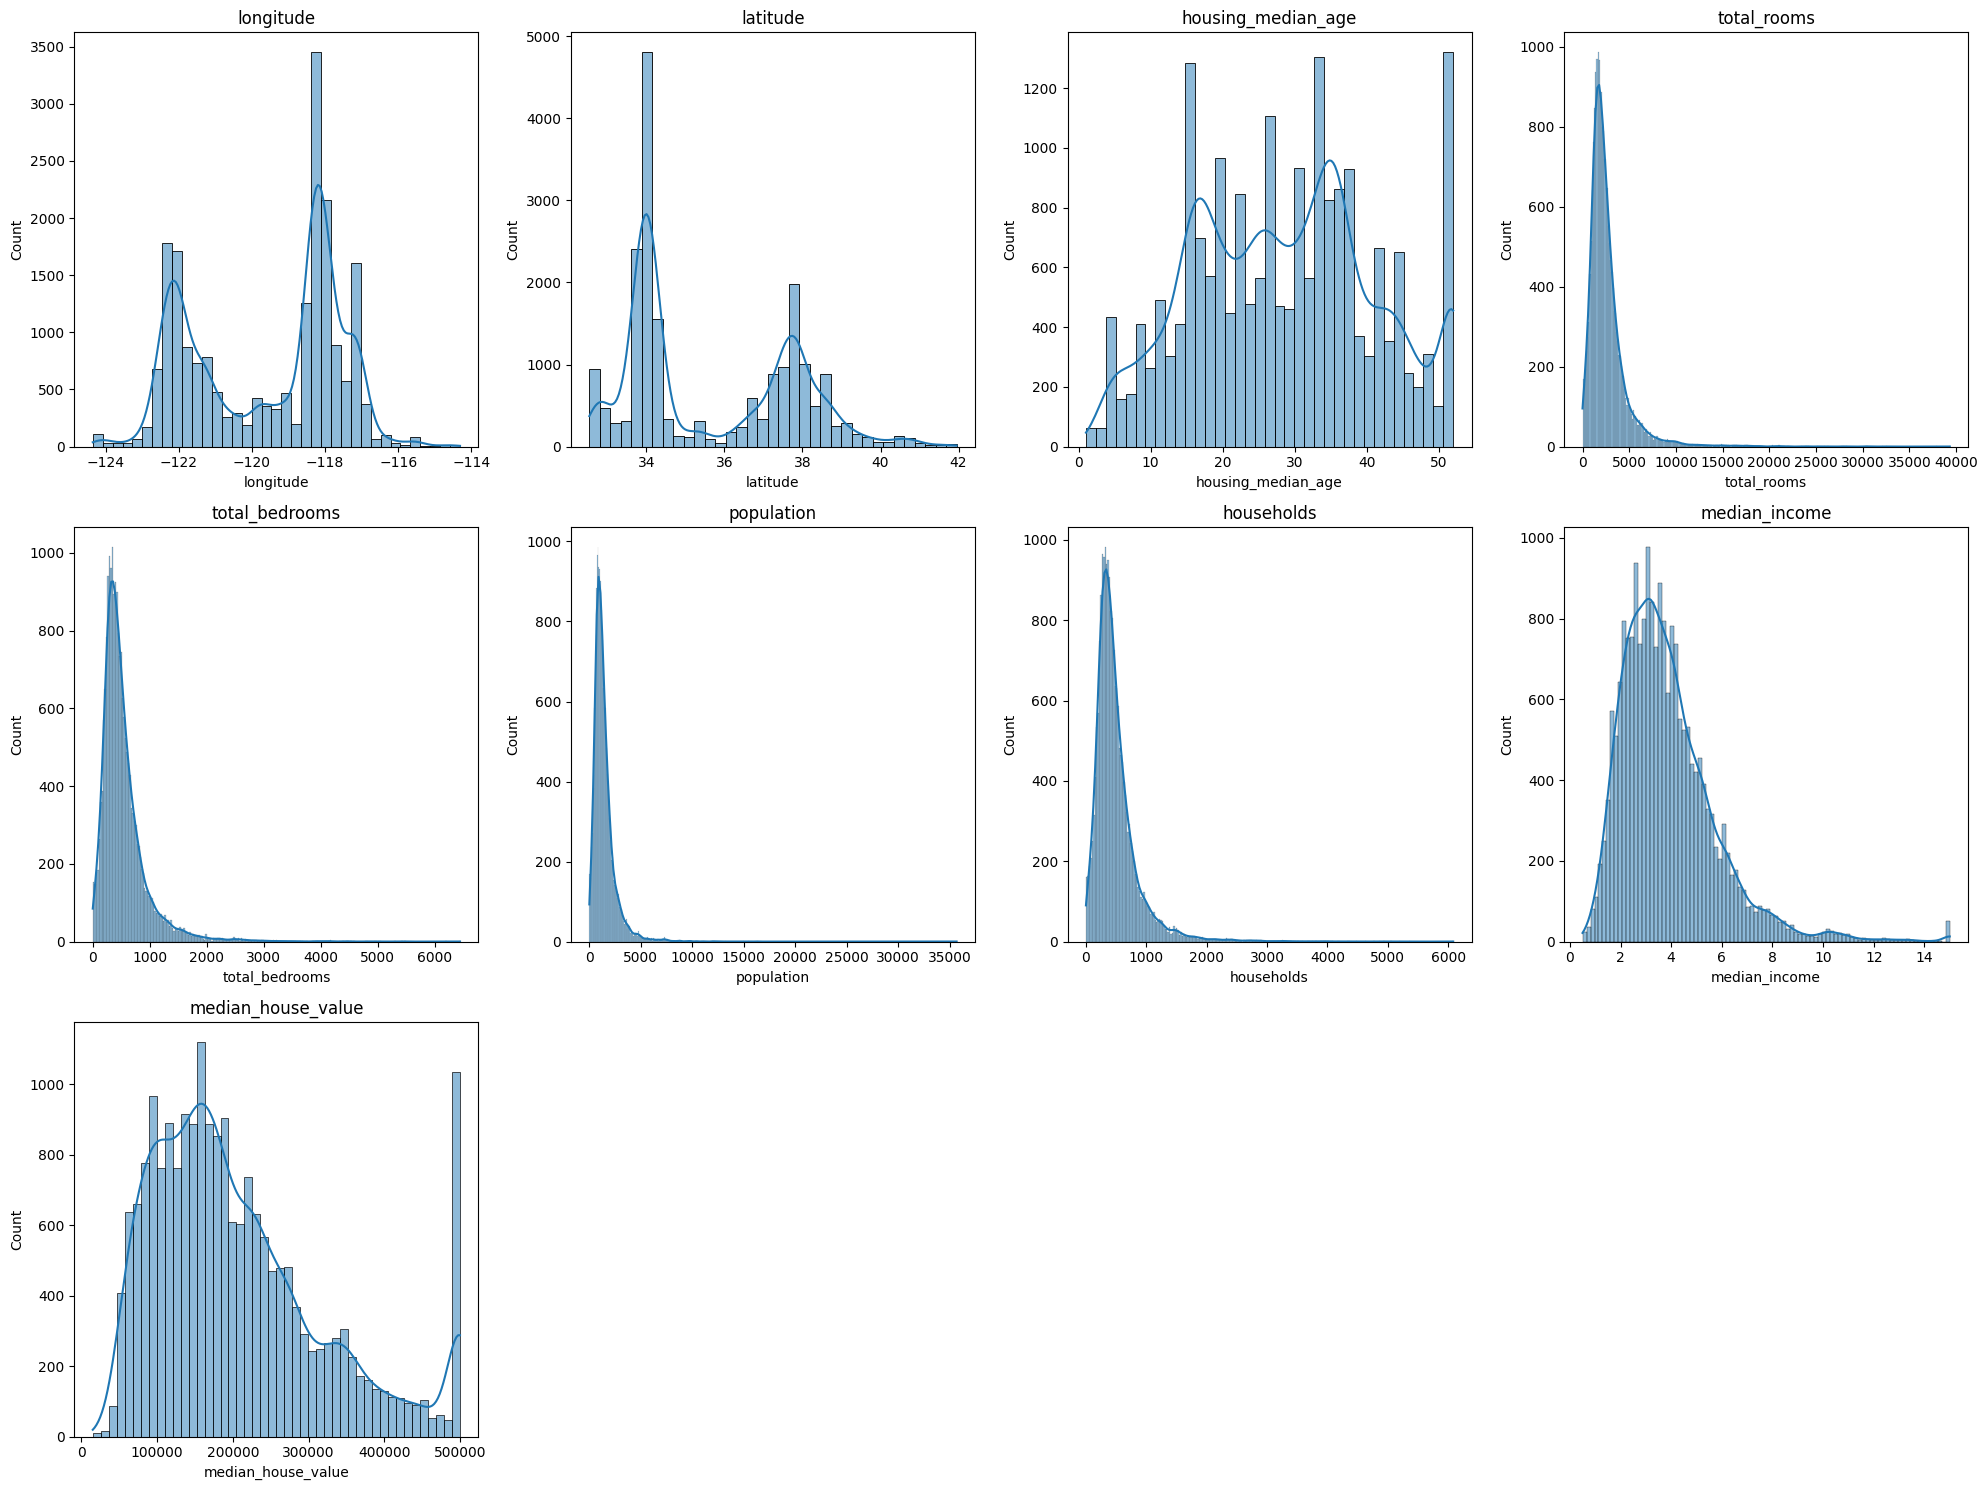

In [5]:
# Creating a histograms for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:-1]):  # Excluding the last column (ocean_proximity)
    plt.subplot(3, 4, i + 1)  # Adjusting the subplot grid to accommodate 10 columns
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
# Displaying the shape of the dataset
print("Dataset shape:", df.shape)


Dataset shape: (20640, 10)



## 3.1. Is there **Duplicated** Data?<a name="31-duplicated"></a>

In [7]:
df.duplicated().sum()

0

## 3.2. Are there **Missing** Values in the Data?<a name="32-missing-values"></a>

In [8]:
# Checking for missing values
print("\nMissing values in the dataset:\n")
print(df.isnull().sum())


Missing values in the dataset:

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## 3.3. Are there **Outlier** Values in the Data?<a name="33-outlier-values"></a>


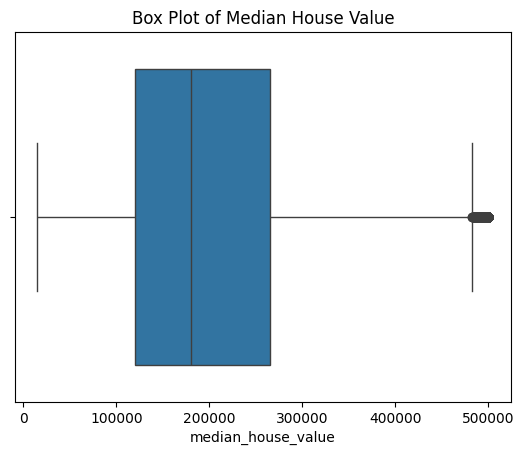

In [9]:
# Creating a box plot for 'median_house_value'
sns.boxplot(x=df['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.show()

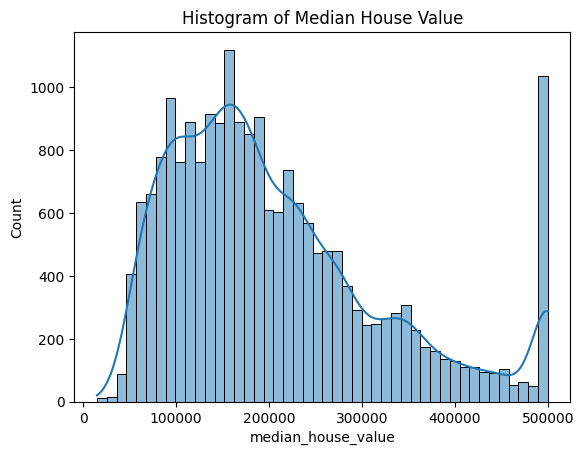

In [10]:
# Creating a histogram for 'median_house_value'
sns.histplot(df['median_house_value'], kde=True)
plt.title('Histogram of Median House Value')
plt.show()

# 4. Exploratory Data Analysis **(EDA)** <a name="4-eda"></a>

In [11]:
len(df)

20640

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


## 4.1. **Statistical** Analysis with **Visualizations** <a name="41-visualizations"></a>

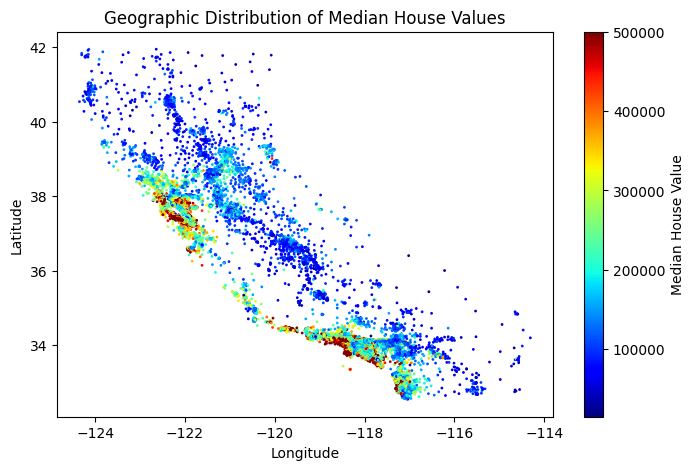

In [14]:
# Plotting Median House Value based on Latitude and Longitude
plt.figure(figsize=(8, 5))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='jet', s=1)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Median House Values')
plt.show()

## 4.2. What is the **correlation** between **numerical columns**? <a name="42-correlation-numerical-columns"></a>   

<ipython-input-15-70729c3f2e21>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)


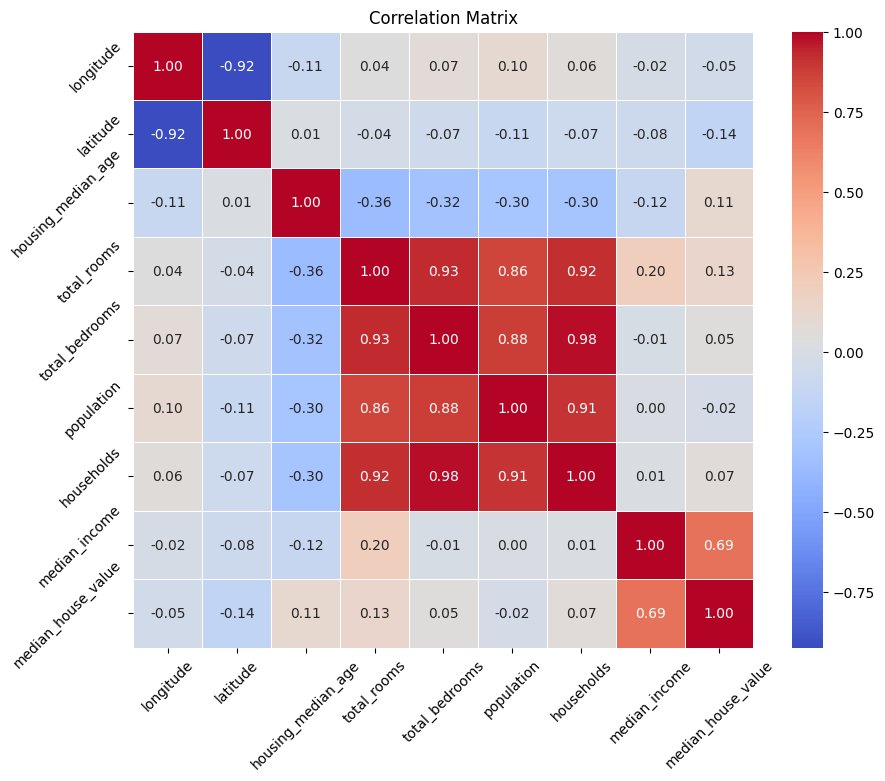

In [15]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# Creating the heatmap with correlation matrix
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Setting the title
heatmap.set_title('Correlation Matrix')

# Rotating the tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Showing the plot
plt.show()

## 4.3. **Overview** of **relationships** between the **variables**.<a name="43-Overview-relationships-columns"></a>   

<ipython-input-16-26c712fcc4aa>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


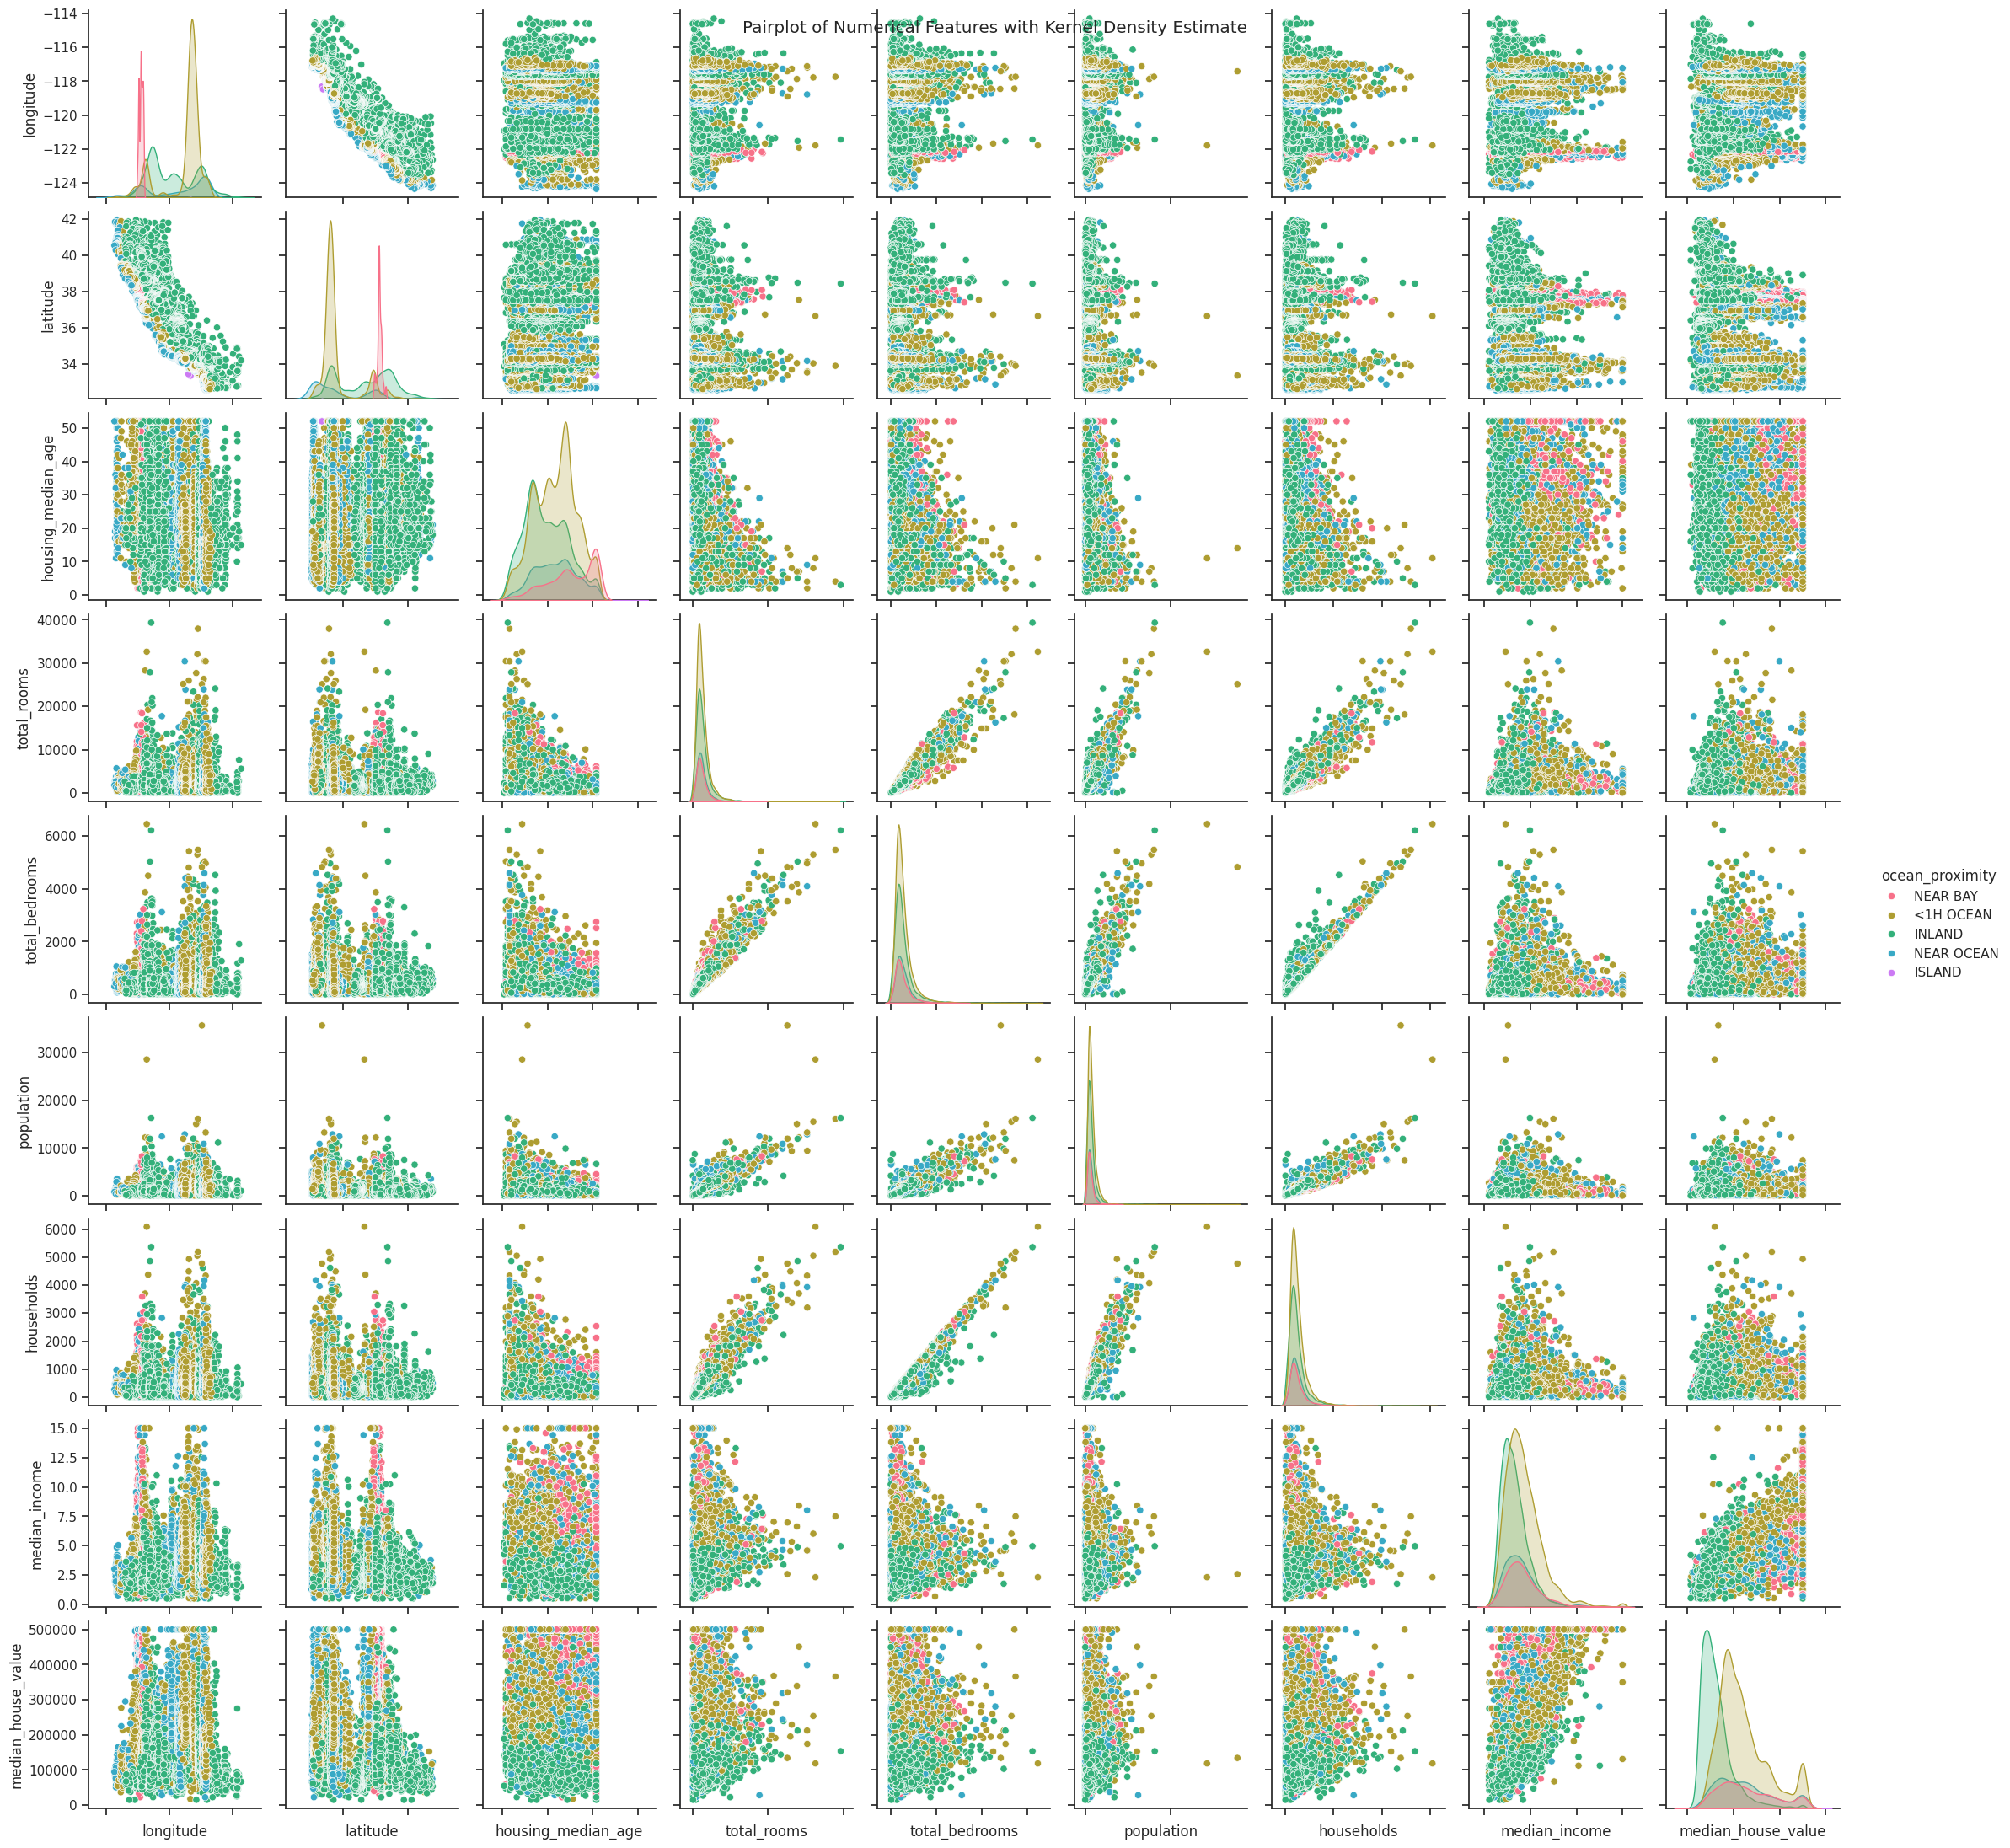

In [16]:
# Setting the style
sns.set(style="ticks", color_codes=True)

# Customizing pairplot
pairplot = sns.pairplot(df, diag_kind='kde', hue='ocean_proximity', palette='husl')

# Adding a title
plt.suptitle("Pairplot of Numerical Features with Kernel Density Estimate")

# Rotating x-axis labels for better readability
for ax in pairplot.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Showing the plot
plt.show()

## 4.4. **Statistical Summary**<a name="44-summary"></a>   

In [17]:
# Summarizing statistics for the dataset
print("\nStatistics summary:")
df.describe()


Statistics summary:


longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [18]:
df.describe().round(2).T # Providing a statistical summary of the numerical columns

count       mean        std       min        25%  \
longitude           20640.0    -119.57       2.00   -124.35    -121.80   
latitude            20640.0      35.63       2.14     32.54      33.93   
housing_median_age  20640.0      28.64      12.59      1.00      18.00   
total_rooms         20640.0    2635.76    2181.62      2.00    1447.75   
total_bedrooms      20433.0     537.87     421.39      1.00     296.00   
population          20640.0    1425.48    1132.46      3.00     787.00   
households          20640.0     499.54     382.33      1.00     280.00   
median_income       20640.0       3.87       1.90      0.50       2.56   
median_house_value  20640.0  206855.82  115395.62  14999.00  119600.00   

                          50%        75%        max  
longitude             -118.49    -118.01    -114.31  
latitude                34.26      37.71      41.95  
housing_median_age      29.00      37.00      52.00  
total_rooms           2127.00    3148.00   39320.00  
total_bedrooms         435.00     647.00    6445.00  
population            1166.00    1725.00   35682.00  
households             409.00     605.00    6082.00  
median_income            3.53       4.74      15.00  
median_house_value  179700.00  264725.00  500001.00

# 5. **preprocessing** Data <a name="5-Preprocessing-Data"></a>


## 5.1. **Preprocessing the data for Machine Learning algorithms**<a name="51-preprocessing"></a>

- Shuffling the DataFrame


In [19]:
# Shuffling the DataFrame
df = shuffle(df, random_state=42)

- Separating the features and labels (X,y)

In [20]:
# Separating the dataset
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"].copy()

- Splitting the dataset into training and testing sets

In [21]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2. **Feature Engineering**<a name="52-feature-eng"></a>




**Creating new features that could potentially improve model performance:**
- **Rooms per Household**: Total rooms in a district divided by the number of households.
- **Bedrooms per Room**: Total number of bedrooms in a district divided by the total number of rooms.
- **Population per Household**: Total population in a district divided by the number of households.

In [22]:
def add_new_features(data):
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
    data["population_per_household"] = data["population"] / data["households"]
    return data

In [23]:
# Applying the function to both training and testing sets
X_train = add_new_features(X_train.copy())
X_test = add_new_features(X_test.copy())

## 5.3. **Transformation Pipelines**<a name="53-pipelines"></a>

In [24]:
num_attribs = list(X_train.select_dtypes(include=[np.number]).columns)
cat_attribs = list(X_train.select_dtypes(exclude=[np.number]).columns)

In [25]:
# Creating a pipeline for numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),  # Imputing missing values with the median
    ('std_scaler', StandardScaler()),  # Standardizing features by removing the mean and scaling to unit variance
])

# Encoding categorical data
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder()),  # Converting categorical variable into dummy/indicator variables
])

# Here a full preprocessing pipeline is created that applies the num and cat pipelines to their respective columns
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

# 6. **Modeling**<a name="6-modeling"></a>

## 6.1. Defining the **Models for Evaluation**<a name="61-modeling-evaluation"></a>

- Selecting a variety of models

Goal is to cover a broad spectrum of machine learning algorithms. Here we include a mix of simple linear-, tree-based-, random forest-, gradient boosting- and SVR-models.

In [26]:
# Defining and training multiple models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Machine', SVR())
]

## 6.2.  training and testing set<a name="62-modeling-t-t"></a>

- Preprocessing the Data

Here we are using the full preprocessing pipeline to transform the training and testing sets. This ensures that all models are trained and tested on the same processed data.

In [27]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [28]:
X_test_prepared = full_pipeline.transform(X_test)

## 6.3. Training and Evaluating Models Using Cross-Validation <a name="63-modeling-evaluate"></a>

- Training each model and evaluating its performance using cross-validation to get an estimate of its generalization error.

In [29]:
# Define the scoring metrics you want to use
scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

In [30]:
for name, model in models:
    scores = cross_validate(model,
                             X_train_prepared,
                             y_train,
                             scoring=scoring_metrics,
                             cv=10,
                             return_train_score=True)
     # Calculate the RMSE scores from neg_mean_squared_error
    rmse_scores = np.sqrt(-scores['test_neg_mean_squared_error'])

    # Access R² and MAE scores
    r2_scores = scores['test_r2']
    mae_scores = -scores['test_neg_mean_absolute_error']  # Negate to make positive

    # Print the results for each model
    print(f"{name}:")
    print(f"  Average RMSE: {np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
    print(f"  Average R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")
    print(f"  Average MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}\n")

Linear Regression:
  Average RMSE: 68305.59 ± 1751.25
  Average R²: 0.65 ± 0.02
  Average MAE: 49130.80 ± 757.31

Decision Tree:
  Average RMSE: 70837.87 ± 2558.68
  Average R²: 0.62 ± 0.03
  Average MAE: 45322.63 ± 1530.36

Random Forest:
  Average RMSE: 50076.61 ± 1864.54
  Average R²: 0.81 ± 0.01
  Average MAE: 32706.22 ± 1201.10

Gradient Boosting:
  Average RMSE: 53143.27 ± 1794.10
  Average R²: 0.79 ± 0.01
  Average MAE: 36852.57 ± 1095.88

Support Vector Machine:
  Average RMSE: 118050.93 ± 2155.97
  Average R²: -0.05 ± 0.01
  Average MAE: 87915.44 ± 1875.21



## 6.4. Optimizing Model <a name="64-modeling-optimizing"></a>

- Model Selection

Based on the cross-validation results, we are selecting the Random Forest model with the lowest average RMSE as a candidate model for further tuning and analysing.

- Hyperparameter Tuning

Applying hyperparameter tuning to models.

In [31]:
param_distributions = {
    'n_estimators': randint(100, 500),  # Assigning the number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Assigning the number of features to consider at every split
    'max_depth': randint(10, 100),  # Assigning the maximum number of levels in tree
    'min_samples_split': randint(2, 10),  # Assigning the minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 4),  # Assigning the minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Assigning the method of selecting samples for training each tree
}

In [32]:
# Creating a Random Forest model
rf = RandomForestRegressor(random_state=42)

In [33]:
# Setting up the RandomizedSearchCV instance
rnd_search = RandomizedSearchCV(rf, param_distributions=param_distributions,
                                n_iter=10,
                                cv=5,
                                scoring='neg_mean_squared_error',
                                random_state=42,
                                verbose=2,
                                n_jobs=-1)

In [34]:
# Fitting the RandomizedSearchCV instance
rnd_search.fit(X_train_prepared, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3d1a149cf0>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3d168437f0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3d16843a00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3d16843970>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

- Evaluating the Best Model from Hyperparameter Tuning

After finding the best hyperparameters using RandomizedSearchCV, we evaluate the best model on the test set to see how much the performance has improved.

In [35]:
final_model = rnd_search.best_estimator_

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE on Test Set: {final_rmse}")

Final RMSE on Test Set: 46598.56660232427


# 7. **Predicting**, Feature Importance and Error Analysis<a name="7-predict"></a>

## 7.1. **Predicting**<a name="71-predicting"></a>

- Selecting Data for Prediction

In [36]:
# Selecting a small sample from the training set
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

- Selecting the Corresponding Labels

In [37]:
# Transforming the sample data using the full preprocessing pipeline
some_data_prepared = full_pipeline.transform(some_data)

- Making Predictions

In [38]:
# Making predictions with the final model
some_predictions = final_model.predict(some_data_prepared)

In [39]:
print("Predictions:", some_predictions)
print("Actual values:", list(some_labels))

Predictions: [284145.78485309 202359.05901722 202037.62944845 206970.09259752
 318282.61531155]
Actual values: [283700.0, 190500.0, 161800.0, 171900.0, 321200.0]


The percentage differences between the predictions and the actual values for each of the five instances are as follows:

- 0.16% (prediction is slightly higher than the actual value)
- 6.23% (prediction is higher than the actual value)
- 24.87% (prediction is higher than the actual value)
- 20.40% (prediction is higher than the actual value)
- 0.91% (prediction is slightly lower than the actual value)

## 7.2. Analyzing **feature importance**<a name="72-predict-features"></a>

- Feature Importance

For Random Forest model, our chosen final model, we can directly get the feature importances which indicates how much each feature contributes to the model's predictions.

In [40]:
# Finding feature_importance_ for the final_model
feature_importances = final_model.feature_importances_

In [41]:
# Getting the feature names after the ColumnTransformer transformation
feature_names = full_pipeline.transformers_[0][2] + \
    list(full_pipeline.named_transformers_['cat'].get_feature_names_out())

In [42]:
# Mapping these importances to their corresponding feature names and sorting them
sorted_features = sorted(zip(feature_importances, feature_names), reverse=True)

In [43]:
# Printing the feature importances
print("Feature Importances:")
for importance, name in sorted_features:
    print(f"{name}:\n {importance}\n")

Feature Importances:
median_income:
 0.29787282643706564

ocean_proximity_INLAND:
 0.14765191609356654

population_per_household:
 0.09701299758867073

bedrooms_per_room:
 0.09042369530991275

longitude:
 0.08928308541429028

latitude:
 0.08059916458336412

rooms_per_household:
 0.06453492438313611

housing_median_age:
 0.03921551551198469

ocean_proximity_<1H OCEAN:
 0.018845377893559462

total_rooms:
 0.017167050312982664

population:
 0.016606893301310738

total_bedrooms:
 0.013775789770746366

households:
 0.01342023135661253

ocean_proximity_NEAR OCEAN:
 0.007381279889660182

ocean_proximity_NEAR BAY:
 0.006085973039983757

ocean_proximity_ISLAND:
 0.00012327911315339454



## 7.3. **Analyzing Errors**<a name="73-error-analysis"></a>



- Analyzing errors involves looking closer at the instances where the model performed poorly. It helps us to identify any systematic errors and understand under which conditions the model is less reliable.

In [44]:
# Making predictions
predictions = final_model.predict(X_test_prepared)

In [45]:
# Calculating the residuals/errors
errors = y_test - predictions

In [46]:
# Analyzing errors
print(errors.describe())

count      4128.000000
mean       -137.443320
std       46604.009113
min     -322772.479626
25%      -22765.846607
50%       -5218.222014
75%       15698.746363
max      352081.256776
Name: median_house_value, dtype: float64


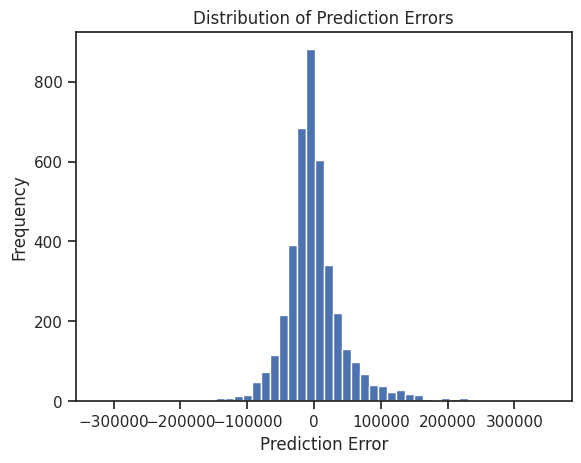

In [47]:
plt.hist(errors, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

- Detailed Error Analysis

In [48]:
# Converting errors to a DataFrame for easier manipulation
errors_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Error': errors})

In [49]:
# Sorting the DataFrame by the absolute errors
errors_df = errors_df.abs().sort_values(by='Error', ascending=False)

In [50]:
# Inspecting the top instances with the highest errors
print(errors_df.head())

         Actual      Predicted          Error
16556  475000.0  122918.743224  352081.256776
18501  131300.0  454072.479626  322772.479626
12138  500001.0  187970.632792  312030.367208
19542  450000.0  146364.731253  303635.268747
10415  500001.0  198938.539194  301062.460806


# 8. **Exporting to files**<a name="8-save-project"></a>

In [51]:
# Saving the model to disk
model_filename = 'california_model.joblib'
dump(final_model, model_filename)

# Saving the full preprocessing pipeline
full_pipeline_filename = 'full_pipeline.joblib'
dump(full_pipeline, full_pipeline_filename)

print(f"Model saved as {model_filename}")
print(f"Full Pipeline saved as {full_pipeline_filename}")

Model saved as california_model.joblib
Full Pipeline saved as full_pipeline.joblib
